# Fourier series of a function f(x), with two classes: one class for the Fourier coefficients and a second class the Fourier series

Most of the content of this notebook is from

Bruce Shapiro

Scientific Computation Python Hacking for Math Junkies

http://www.calculuscastle.com/pythonbook.html

Chapter 30

In [3]:
from math import sin, cos, pi
import math
import scipy.integrate as integ 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# This is the function for which I calculate the Fourier Series
def f(x):
    if x < 1:
        return 1
    else:
        return -1

In [5]:
class FuourierCoeff():
    def __init__(self, f, L, n):
        elle = float(L)
        k = float(n)*pi/elle
        def ga(x):
            return f(x)*cos(k*x)
        def gb(x):
            return f(x)*sin(k*x)
        self.a = 1.0/elle *  integ.quad(ga, 0, 2*elle)[0]
        self.b = 1.0/elle *  integ.quad(gb, 0, 2*elle)[0]
    def __repr__(self):
        return str([self.a, self.b])

print (" -------------------------------------------- ")
FC = FuourierCoeff(f, 2, 2)
print (FC)
print (" -------------------------------------------- ")


print (" -------------------------------------------- ")
FC = [FuourierCoeff(f, 2,j) for j in range(11)]
for j in range(11):
    print ("%2d %15.10f %15.10f" %(j, FC[j].a, FC[j].b))

 -------------------------------------------- 
[-9.973949083949052e-17, 0.6366197723675814]
 -------------------------------------------- 
 -------------------------------------------- 
 0   -1.0000000000    0.0000000000
 1    0.6366197724    0.6366197724
 2   -0.0000000000    0.6366197724
 3   -0.2122065908    0.2122065908
 4    0.0000000000    0.0000000000
 5    0.1273239545    0.1273239545
 6    0.0000000000    0.2122065908
 7   -0.0909456818    0.0909456818
 8    0.0000000000   -0.0000000000
 9    0.0707355303    0.0707355303
10    0.0000000000    0.1273239545


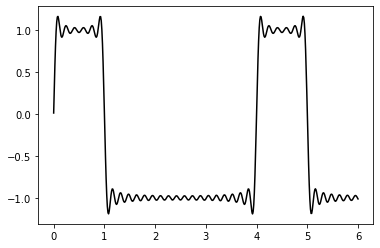

In [6]:
class FuourierSeries():
    def __init__(self, f, L, n):
        coeff= FC = [FuourierCoeff(f, 2, j) for j in range(n+1)]
        self.a = [FC.a for FC in coeff]
        self.b = [FC.b for FC in coeff]
        self.k = [k*math.pi/float(L) for k in range(n+1)]
    
    def value (self,x):
        def dot(A,B):
            return sum([a*b for a, b in zip(A,B)])
        cosvals = [math.cos(K*x) for K in self.k]
        sinvals = [math.sin(K*x) for K in self.k]
        cosvals[0] = 0.5
        sinvals[0] = 0.0
        return dot(self.a, cosvals) + dot(self.b, sinvals)


xvals = np.linspace(0, 6, 500)
F     = FuourierSeries(f, 2, 25)
yvals = [F.value(x) for x in xvals]
plt.plot(xvals, yvals, c="k")